In [23]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()

In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from PIL import Image
from numpy import asarray
import math
import numpy.matlib
from scipy.stats import multivariate_normal as mvn
import scipy.io
from sklearn import preprocessing
import warnings

warnings.filterwarnings('ignore')

data=pd.DataFrame(faces['data'])
imges=faces['images']
target=faces['target'].tolist()
shape=imges.shape


In [96]:
# after download:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from PIL import Image
from numpy import asarray
import math
import numpy.matlib
from scipy.stats import multivariate_normal as mvn
import scipy.io
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
# after download:
def load_data(url):    
    df2 = pd.read_csv(url)
    data = df2.drop('target', axis=1)
    target= df2['target'].tolist()
    shape=(64,64)
    return data, target,shape
data, target,shape= load_data('data/face_data/face_data.csv')

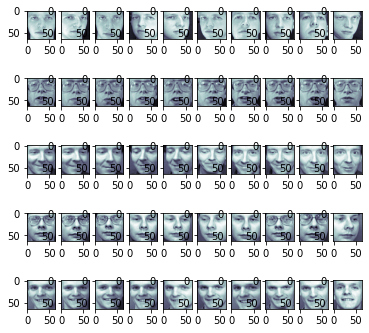

In [3]:
fig, axes = plt.subplots(5, 10, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(np.array(data)[i].reshape(64, 64), cmap='bone')
plt.show()

In [4]:
def split(data, target):
    train_data, test_data, train_target, test_target = train_test_split(data, target)
    return train_data, test_data, train_target, test_target
train_data, test_data, train_target, test_target = split(data, target)

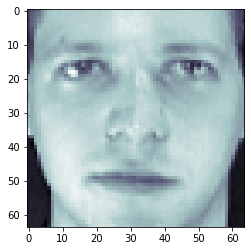

In [5]:
def img_show(data,x=1,y=1):
    fig, axes = plt.subplots(x, y)
    if data.shape !=(64,64) and data.shape!=(4096,):
        
        for i, ax in enumerate(axes.flat):
            ax.imshow(np.array(data)[i].reshape(64, 64), cmap='bone')
        plt.show()
    else:
        plt.imshow(np.array(data).reshape(64, 64), cmap='bone')   

img_show(data.T[0])

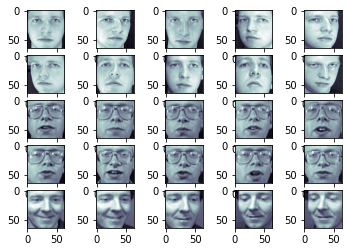

In [6]:
img_show(data,5,5)

In [7]:
def pcatrain(data,threshhoold):
    pca_raw = PCA().fit(data)   
    pca = PCA(n_components=len(np.where(pca_raw.explained_variance_ratio_.cumsum() > threshhoold))).fit(data)
    return pca, pca_raw.explained_variance_ratio_.cumsum()

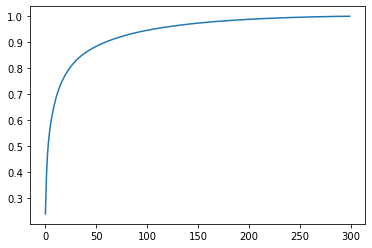

In [8]:
trained=pcatrain(train_data,0.9)[0].transform(data)
plt.plot(pcatrain(train_data,0.9)[1])

In [11]:

pca = PCA(n_components=105).fit(train_data)
test=np.where(pca.explained_variance_ratio_.cumsum() > 0.95)
#####################
X_train_pca = pca.transform(train_data)
X_train_pca.shape

(300, 105)

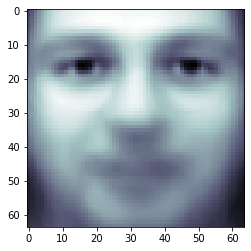

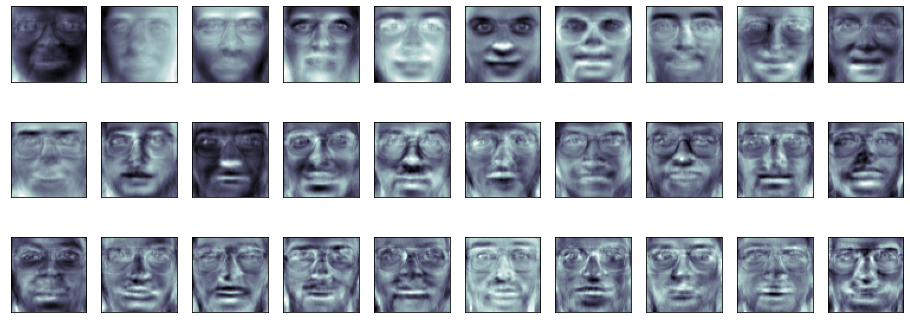

In [12]:
plt.imshow(pca.mean_.reshape(64,64),
           cmap=plt.cm.bone)
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(64,64),
              cmap=plt.cm.bone)

In [13]:
test_data.shape

(100, 4096)

In [14]:
def NB(X,y):
    gnb = GaussianNB(var_smoothing=1e-3)
    return gnb.fit(X, y)
nb=NB(train_data,train_target)
nb.predict(test_data)

array([33,  2,  4, 32, 10, 38,  3,  2,  3, 20,  4, 36,  8,  3, 11,  2, 35,
        7, 39, 29, 14,  3,  5,  4, 22, 31, 31, 34,  2, 34, 39, 39, 12, 21,
        6, 38,  0, 26, 14,  9, 14, 35, 16, 16, 29, 22, 19, 37, 13, 39, 27,
        4, 32, 14,  9,  4, 11, 35,  3,  7,  0, 11,  2, 12, 20, 16, 19, 25,
        6, 15, 34, 28, 30, 19, 21,  3,  6, 28, 11, 37, 24, 24, 15, 39, 30,
       39, 32,  9, 19, 33,  2, 15, 35, 24, 27, 15, 14, 38,  0, 22])

In [15]:
def KNN(X,y):
    neigh = KNeighborsClassifier(n_neighbors=3)
    return neigh.fit(X,y)
knn=KNN(train_data,train_target)
knn.predict(test_data)

array([33,  3,  4, 32, 10, 38, 22,  2,  3, 29, 29, 36,  8,  3, 11,  4, 35,
        7,  3, 29, 14, 22,  5,  4, 22, 31, 31,  4,  2,  4,  0,  4, 12, 21,
       18, 38,  0, 26, 14,  0, 14, 35, 12,  3, 29, 22, 19, 37, 13,  3, 27,
        4, 32, 14,  9,  4, 11, 35,  3,  7,  0, 11, 25, 12, 20,  6, 19, 25,
        6,  3, 20, 28, 20, 19, 21,  1,  6, 32, 11, 37, 24, 24,  3,  4, 30,
        2, 32,  9, 19, 33, 20,  0, 23, 24, 27,  0, 14, 38,  0, 22])

In [16]:
#############################
def Gaussian(data,mu,sigma):
    temp=[]
    for i in data:
        temp.append(np.exp(-0.5*(i-mu).T@np.linalg.inv(sigma)@(i-mu))/((np.linalg.det(sigma))**0.5))
    return np.asarray(temp)

def em_alg(data,y):
    seed=1
    ndata=np.asarray(data)
    m, n = ndata.shape
    C = np.matmul(ndata.T, ndata)/m
  
    # pca the data
    d = 4  # reduced dimension
    V,_,_ = np.linalg.svd(C)
    V = V[:, :d]

    pdata = np.dot(ndata,V)
    K = 2

    # random seed


    # initialize prior
    np.random.seed(seed)
    pi = np.random.random(K)
    pi = pi/np.sum(pi)

    # initial mean and covariance
    np.random.seed(seed)
    mu = np.random.randn(K,d)
    mu_old = mu.copy()

    sigma = []
    for ii in range(K):
        # to ensure the covariance psd
        np.random.seed(seed)
        dummy = np.random.randn(d, d)
        sigma.append(dummy@dummy.T+np.identity(d))

    # initialize the posterior
    tau = np.full((m, K), fill_value=0.)
    logtau = np.full((m, K), fill_value=0.)
    #####
    maxIter= 100
    tol = 1e-3

    #plt.ion()
    mu_list=[]   
    for ii in range(100):

        # E-step    
        for kk in range(K):
            tau[:, kk] = pi[kk] * Gaussian(pdata, mu[kk], sigma[kk])

        # normalize tau
        sum_tau = np.sum(tau, axis=1)
        mu_list.append(np.mean(np.log(sum_tau)))
        sum_tau.shape = (m,1)    
        tau = np.divide(tau, np.tile(sum_tau, (1, K)))


        # M-step
        for kk in range(K):
            # update prior
            pi[kk] = np.sum(tau[:, kk])/m

            # update component mean
            mu[kk] = pdata.T @ tau[:,kk] / np.sum(tau[:,kk], axis = 0)

            # update cov matrix
            dummy = pdata - np.tile(mu[kk], (m,1)) # X-mu
            sigma[kk] = dummy.T @ np.diag(tau[:,kk]) @ dummy / np.sum(tau[:,kk], axis = 0)

        if np.linalg.norm(mu-mu_old) < tol:
            print('training coverged')
            break
        mu_old = mu.copy()
        if ii==99:
            print('max iteration reached')
            break

        return mu_list, mu, sigma, V

mu_list, mu, sigma,  V = em_alg(train_data,train_target)



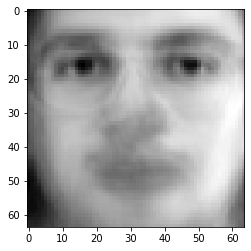

In [17]:
plt.imshow((V@(mu[0])).T.reshape((64,64)), cmap=plt.cm.gray)

 The best solution found:                                                                           
 [0.00024904 0.00448947 0.00014213]

 Objective function:
 0.004880635005111156


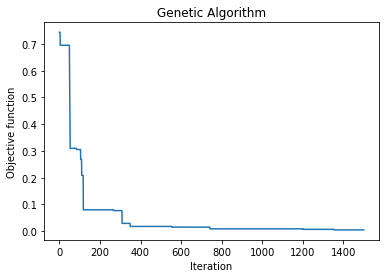

In [21]:
from geneticalgorithm import geneticalgorithm as ga
def f(X):
    return np.sum(X)


varbound=np.array([[0,10]]*3)

model=ga(function=f,dimension=3,variable_type='real',variable_boundaries=varbound)

model.run()

[1.6089486  3.5271731  9.47606323]
[7.74558438 4.71963402 4.70187466]
[8.38993842 3.22018586 1.48744754]
[4.62049351 3.61815754 5.17274508]
[2.91310918 7.92231321 8.96536471]
[5.50068044 6.08083958 5.47274971]
[6.2743217  5.27173718 6.4860293 ]
[2.03624372 6.98232214 0.83095426]
[5.3599468  9.75477853 1.24019417]
[7.85003538 9.84096043 2.59181942]
||________________________________________________ 3.3% GA is running...[2.03624372 6.08083958 5.47274971]
[5.50068044 6.98232214 0.83095426]
[5.50068044 6.08083958 5.47274971]
[5.50068044 6.08083958 7.62412145]
[2.03624372 6.08083958 5.47274971]
[5.50068044 6.98232214 0.83095426]
|||_______________________________________________ 6.7% GA is running...[2.03624372 6.98232214 0.83095426]
[2.03624372 6.98232214 0.83095426]
[5.50068044 6.98232214 0.83095426]
[0.44524931 6.98232214 0.83095426]
[5.50068044 6.98232214 0.83095426]
[5.26661563 6.98232214 0.83095426]
|||||_____________________________________________ 10.0% GA is running...[5.50068044 6

[2.67869017 0.36788223 0.83095426]
[0.38288283 0.36788223 2.50702122]
||||||||||||||||||||||||||||||||||||||||||||||||__ 96.7% GA is running...[0.38288283 0.36788223 0.83095426]
[0.38288283 0.36788223 0.83095426]
[0.38288283 0.36788223 0.83095426]
[0.38288283 0.36788223 0.83095426]
[0.38288283 0.36788223 0.83095426]
[0.38288283 0.36788223 0.83095426]
|||||||||||||||||||||||||||||||||||||||||||||||||| 100.0% GA is running...[2.67869017 0.36788223 0.83095426]
[1.9044398  0.36788223 0.83095426]
[0.38288283 0.36788223 0.83095426]
[2.67869017 5.88181162 0.83095426]
[0.38288283 0.36788223 0.83095426]
[0.38288283 0.36788223 4.0469827 ]
 The best solution found:                                                                           
 [0.38288283 0.36788223 0.83095426]

 Objective function:
 1.581719313255212


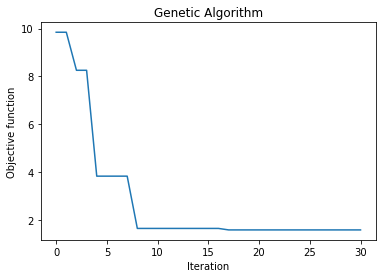

In [22]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

def f(X):
    print(X)
    return np.sum(X)


varbound=np.array([[0,10]]*3)

algorithm_param = {'max_num_iteration': 30,\
                   'population_size':10,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model=ga(function=f,\
            dimension=3,\
            variable_type='real',\
            variable_boundaries=varbound,\
            algorithm_parameters=algorithm_param)

model.run()

In [57]:
data.values[:1]

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ]])

In [ ]:
def fittness(x,y):
    dist = np.linalg.norm(x - y)
    return dist
def maxvalue(x):
    data, target,shape= load_data('data/face_data/face_data.csv')
    test=data.values[29]
    data=data.values[:28]
    testsample=np.dot(x,data)
    return fittness(data,testsample)

varbound=np.array([[0,1]]*28)

algorithm_param = {'max_num_iteration': 100,\
                   'population_size':1000,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model=ga(function=maxvalue,\
            dimension=28,\
            variable_type='real',\
            variable_boundaries=varbound,\
            algorithm_parameters=algorithm_param)

model.run()
convergence=model.report
solution=model.ouput_dict

||||||||__________________________________________ 17.0% GA is running...

In [92]:
convergence=model.report
solution=model.ouput_dict

AttributeError: 'geneticalgorithm' object has no attribute 'ouput_dict'

In [89]:
#samp1,testimg=maxvalue(0)
x=np.random.rand(1,29)
maxvalue(x)

2878.26817670598

In [113]:
x=np.random.rand(1,28)

In [114]:
testdata=data[:28].values

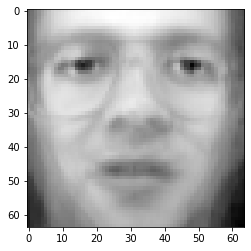

In [115]:
testsample=np.dot(x,testdata)
plt.imshow(testsample.reshape((64,64)), cmap=plt.cm.gray)

In [83]:
def fittness(x,y):
    dist = np.linalg.norm(x - y)
    return dist
fittness(testsample,samp1)

3263.6239955519727

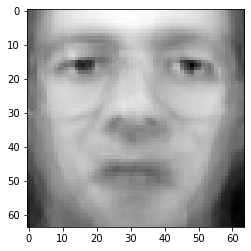

In [124]:
X="0.08535549 0.50316005 0.09254947 0.16101998 0.12725456 0.32798642 0.36714103 0.54716152 0.0793366  0.03231174 0.00577548 0.04008522  0.37921132 0.16467576 0.36613711 0.10096414 0.32446601 0.01314571  0.04448542 0.00594484 0.44105685 0.03688382 0.02200848 0.13072209 0.28461533 0.39395514 0.00721008 0.17437579"
testdata=data[:28].values.astype(float)
x = np.asarray(X.split())  .astype(float) 

testsample=np.dot(x,testdata)
plt.imshow(testsample.reshape((64,64)), cmap=plt.cm.gray)

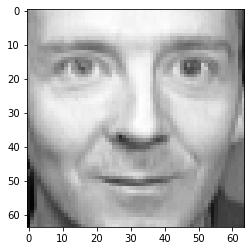

In [127]:
plt.imshow(data.values[28].reshape((64,64)), cmap=plt.cm.gray)

In [ ]:
plt.imshow(testsample.reshape((64,64)), cmap=plt.cm.gray)

In [94]:
convergence

[2245.133798465932,
 2245.133798465932,
 2168.9042615646777,
 2074.0541244357555,
 2050.738744260547,
 1997.8597023763584,
 1966.1397270157179,
 1941.6983018756314,
 1888.9391856684838,
 1691.6717127268657,
 1691.6717127268657,
 1667.8817263442563,
 1605.8188073742724,
 1537.211915167239,
 1424.1382262481006,
 1424.1382262481006,
 1424.1382262481006,
 1424.1382262481006,
 1424.1382262481006,
 1423.1686541486845,
 1423.1686541486845,
 1423.1686541486845,
 1423.1686541486845,
 1327.0211783525663,
 1327.0211783525663,
 1327.0211783525663,
 1296.930788039514,
 1255.809799303774,
 1215.4263800698477,
 1215.4263800698477,
 1215.4263800698477]

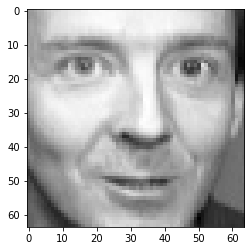